In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [196]:
df=pd.read_csv('news.csv')
df.head()
dflabel=df.label
dflabel.head()
target=df.label.value_counts()
print(target)

REAL                                                                            3161
FAKE                                                                            3154
 or naturalization or by jus sanguinis – inherited through ancestors/parents       3
 for example                                                                       2
 Philippines                                                                       2
                                                                                ... 
 Plan D marked                                                                     1
 the Jewish settlers had built their houses higher up the mountain. Thus           1
 Tel Aviv–Jaffa                                                                    1
 the Haganah attacked the village of Khisas at night                               1
 George W. Bush                                                                    1
Name: label, Length: 437, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [197]:
dflabel=df.label
dflabel.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [198]:
target=df.label.value_counts()
print(target)


REAL                                                                            3161
FAKE                                                                            3154
 or naturalization or by jus sanguinis – inherited through ancestors/parents       3
 for example                                                                       2
 Philippines                                                                       2
                                                                                ... 
 Plan D marked                                                                     1
 the Jewish settlers had built their houses higher up the mountain. Thus           1
 Tel Aviv–Jaffa                                                                    1
 the Haganah attacked the village of Khisas at night                               1
 George W. Bush                                                                    1
Name: label, Length: 437, dtype: int64


In [199]:
df.shape

(7795, 141)

In [200]:
#removing rows with non REAL/FAKE values (incorrect data entry)
for i in range(0,7795):
    x=df.loc[i,"label"]
    if (x!= 'REAL') and (x!= 'FAKE'):
        df.drop(i, inplace=True)
target=df.label.value_counts()
print(target)

REAL    3161
FAKE    3154
Name: label, dtype: int64


In [201]:
dflabel=df.label
df.shape

(6315, 141)

In [202]:
xtrain,xtest,ytrain,ytest=train_test_split(dftext, dflabel, test_size=0.2, random_state=5)

In [203]:
#initializing a Tfidf Vectorizer
tv=TfidfVectorizer(stop_words='english', max_df=0.7)
tftrain=tv.fit_transform(xtrain)
tftest=tv.transform(xtest)

In [204]:
#initializing a Passive Aggressive Classifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tftrain,ytrain)
ypred=pac.predict(tftest)
score=round(accuracy_score(ytest,ypred)*100,2)
print(score,"%")

93.35 %


In [205]:
cm=confusion_matrix(ytest,ypred,labels=['REAL','FAKE'])
print(cm)


[[596  48]
 [ 36 583]]


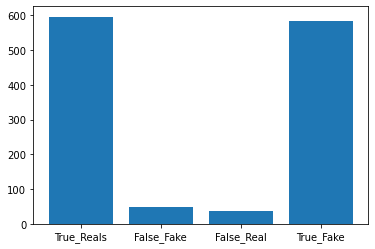

In [206]:
x=['True_Reals', 'False_Fake', 'False_Real', 'True_Fake']
y=[cm[0][0],cm[0][1],cm[1][0],cm[1][1]]
plt.bar(x,y)
plt.show()